# Logistic Regression on Diabetes dataset

Logistic Regression is a popular machine learning model used for binary classification.
Logistic regression can, however, be used for multiclass classification.
**About Dataset**

This dataset describes the medical records for Pima Indians and whether or not each patient will have an onset of diabetes within five years.

Fields description follow:

Pregnancies = Number of times pregnant

Glucose = Plasma glucose concentration a 2 hours in an oral glucose tolerance test

BloodPressure = Diastolic blood pressure (mm Hg)

SkinThickness = Triceps skin fold thickness (mm)

Insulin = 2-Hour serum insulin (mu U/ml)

BMI = Body mass index (weight in kg/(height in m)^2)

DiabetesPedigreeFunction = Diabetes pedigree function

Age = Age (years)

Outcome = Class variable (1:tested positive for diabetes, 0: tested negative for diabetes)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

In [3]:
df = pd.read_csv("diabetes.csv")

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## EDA

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Data visualization

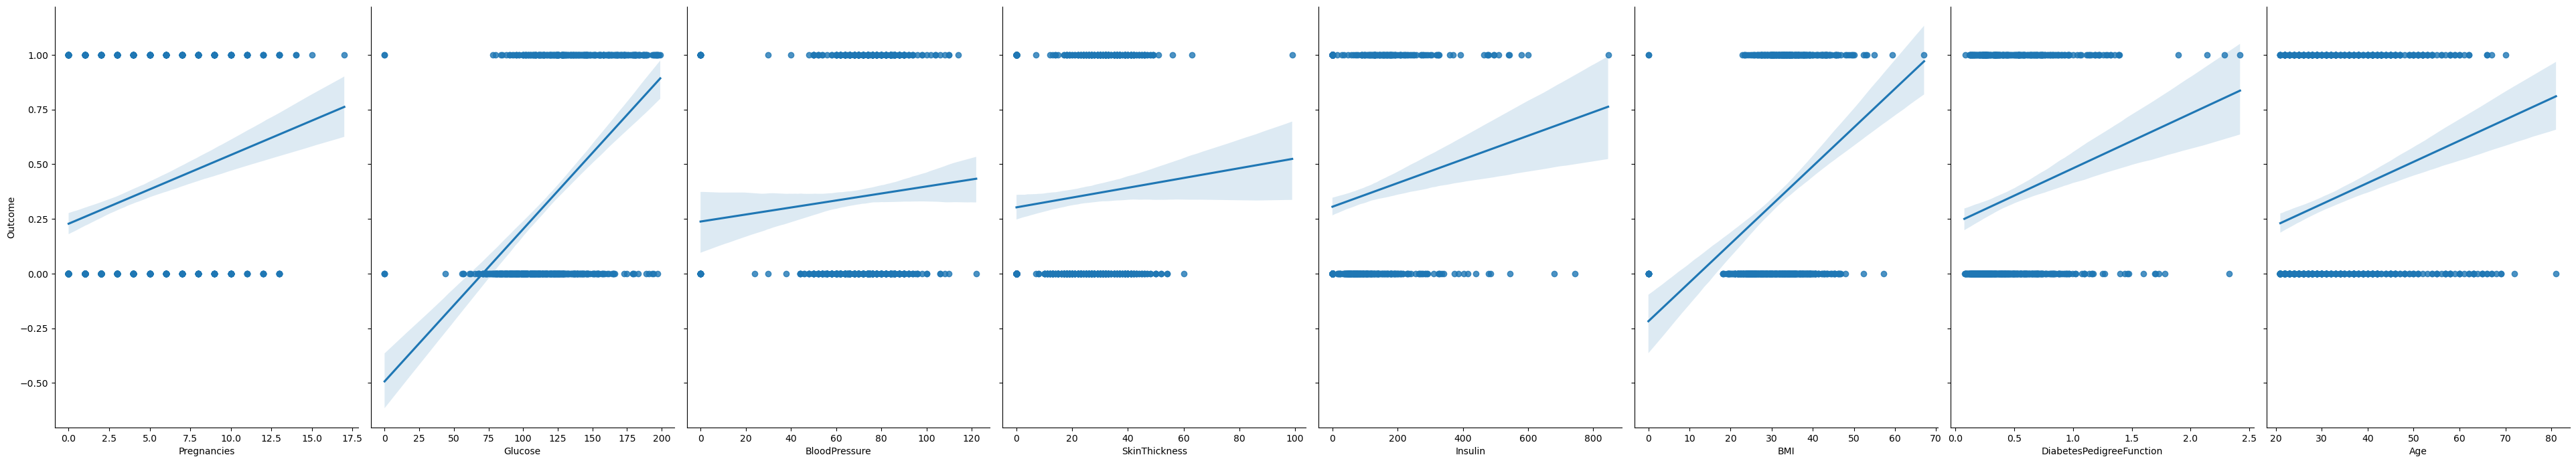

In [6]:
sns.pairplot(df, x_vars= ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age'],
            y_vars='Outcome', height = 7, aspect= 0.7, kind = 'reg')

Outcome
0    [[Axes(0.125,0.666111;0.215278x0.213889), Axes...
1    [[Axes(0.125,0.666111;0.215278x0.213889), Axes...
dtype: object

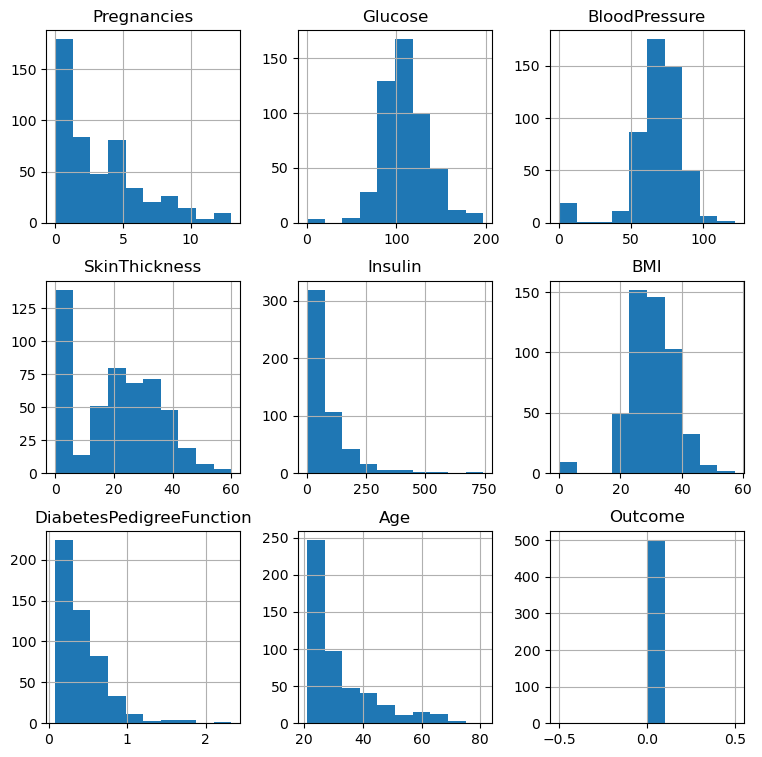

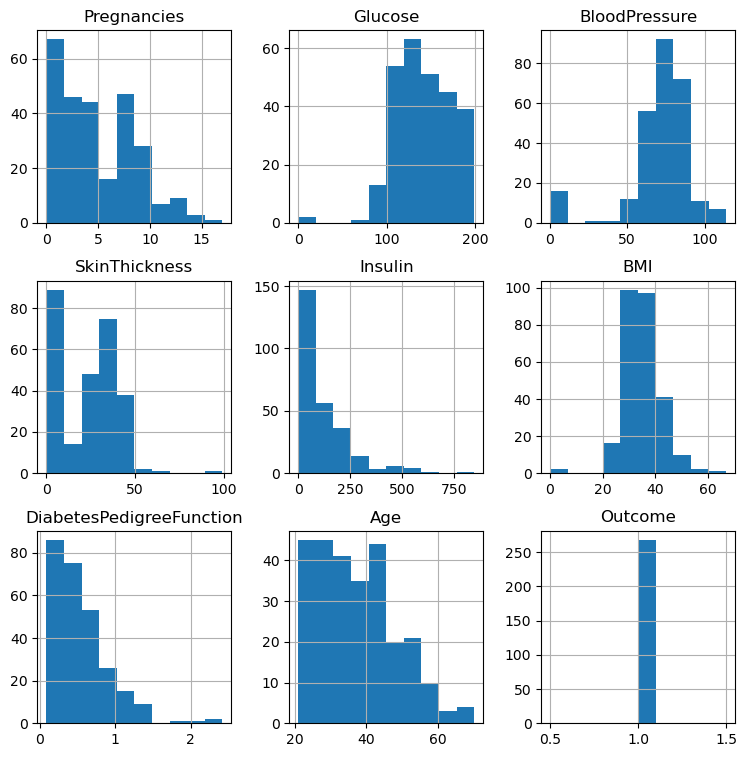

In [7]:
df.groupby('Outcome').hist(figsize=(9, 9))

### Feature Scaling

In [8]:
x = df[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']]
y = df['Outcome']

In [9]:
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [10]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [12]:
from sklearn import preprocessing

In [13]:
pre_process = preprocessing.StandardScaler()
x_new = pd.DataFrame(pre_process.fit_transform(x))

In [14]:
x_new.head()

,0,1,2,3,4,5,6,7
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496


In [15]:
x_new.describe()

,0,1,2,3,4,5,6,7
count,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02
mean,-6.476301e-17,-9.251859e-18,1.503427e-17,1.006140e-16,-3.006854e-17,2.590520e-16,2.451743e-16,1.931325e-16
std,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00
min,-1.141852e+00,-3.783654e+00,-3.572597e+00,-1.288212e+00,-6.928906e-01,-4.060474e+00,-1.189553e+00,-1.041549e+00
25%,-8.448851e-01,-6.852363e-01,-3.673367e-01,-1.288212e+00,-6.928906e-01,-5.955785e-01,-6.889685e-01,-7.862862e-01
50%,-2.509521e-01,-1.218877e-01,1.496408e-01,1.545332e-01,-4.280622e-01,9.419788e-04,-3.001282e-01,-3.608474e-01
75%,6.399473e-01,6.057709e-01,5.632228e-01,7.190857e-01,4.120079e-01,5.847705e-01,4.662269e-01,6.602056e-01
max,3.906578e+00,2.444478e+00,2.734528e+00,4.921866e+00,6.652839e+00,4.455807e+00,5.883565e+00,4.063716e+00


### Test-train split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(x_new, y, test_size=0.2, random_state=42)

In [19]:
print("Training feature set size:",X_train.shape)
print("Test feature set size:",X_test.shape)
print("Training variable set size:",y_train.shape)
print("Test variable set size:",y_test.shape)

Training feature set size: (614, 8)
Test feature set size: (154, 8)
Training variable set size: (614,)
Test variable set size: (154,)


### Test-train split

In [20]:
clf = LogisticRegression()

In [21]:
clf.fit(X_train, y_train)

LogisticRegression()

**Check the intercept and coefficients**

In [22]:
print (clf.intercept_, clf.coef_)

[-0.85571126] [[ 0.21621911  1.06930435 -0.2587175   0.0472661  -0.19919621  0.7920862
   0.22695841  0.43005814]]


### Prediction

In [23]:
y_pred = clf.predict(X_test)

In [24]:
print(y_pred.shape)
print(y_test.shape)

(154,)
(154,)


In [29]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
      dtype=int64)

In [30]:
y_test

668    0
324    0
624    0
690    0
473    0
      ..
355    1
534    0
344    0
296    1
462    0
Name: Outcome, Length: 154, dtype: int64

### Evaluation

In [31]:
print ('Accuracy from sk-learn: {0}'.format(clf.score(X_test, y_test)))

Accuracy from sk-learn: 0.7532467532467533


In [32]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("f1:",metrics.f1_score(y_test,y_pred))

Accuracy: 0.7532467532467533
Precision: 0.6491228070175439
Recall: 0.6727272727272727
f1: 0.6607142857142858


In [33]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[79, 20],
       [18, 37]], dtype=int64)

Text(0.5, 427.9555555555555, 'Predicted label')

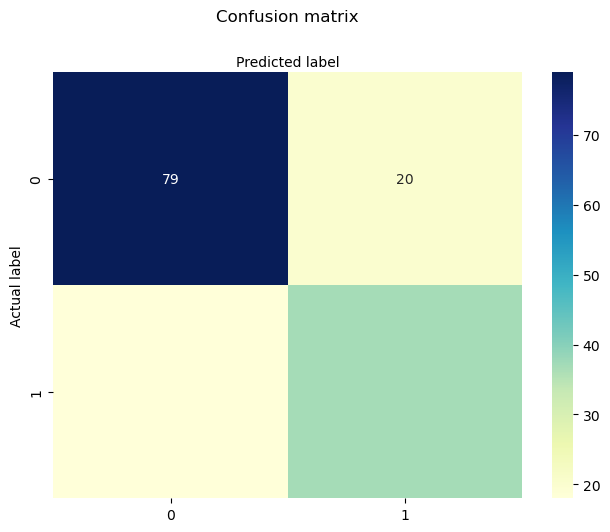

In [34]:
class_names=["Negative","Positive"] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [37]:
print(metrics.confusion_matrix(y_test, y_pred))
# Printing the precision and recall, among other metrics
print(metrics.classification_report(y_test, y_pred))

[[79 20]
 [18 37]]
              precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154

